# **Метод KNN для регрессии. Контрольное задание**

# **1. Подготовка исходных данных**

Сгенерировать исходные данные для обучения модели KNN.

Значения параметров выбираются из таблицы "Варианты".docx в соответствие с номером студента в списке группы в СДО.

In [142]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 942,
                       n_features = 2,
                       n_informative = 1,
                       noise = 10.3,
                       random_state = 10)

Разделить выборку на тренировочную и тестовую.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [143]:
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 10)

print(f"Тренировочная выборка: {X_train.shape} \n Тестовая выборка: {X_test.shape}")

Тренировочная выборка: (753, 2) 
 Тестовая выборка: (189, 2)


Произвести масштабирование значений признаков.

In [144]:
from sklearn.preprocessing import MinMaxScaler
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.transform(X_test)

# **2. Метод KNN**

## Подбор оптимального количества ближайших соседей

Осуществить подбор количества ближайших соседей следующими способами:
- визуальный анализ зависимости метрик качества от количества ближайших соседей;
- визуальный анализ валидационных кривых;
- поиск на сетке.

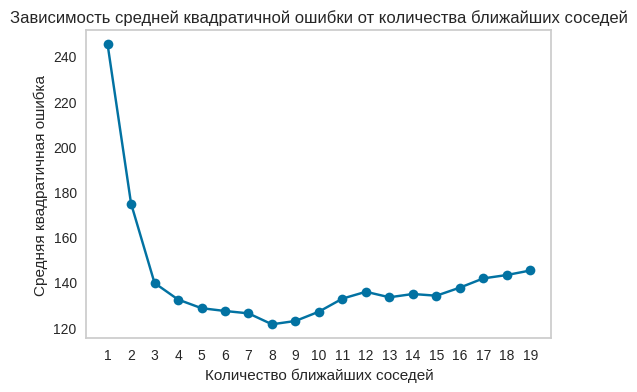

In [145]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

k_values = np.arange(1, 20, 1)
mse_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.figure(figsize = (6, 4))
plt.plot(k_values, mse_list, marker = 'o')
plt.xlabel('Количество ближайших соседей')
plt.ylabel('Средняя квадратичная ошибка')
plt.title('Зависимость средней квадратичной ошибки от количества ближайших соседей')
plt.xticks(ticks = np.arange(1, 20, 1))
plt.grid()
plt.show()

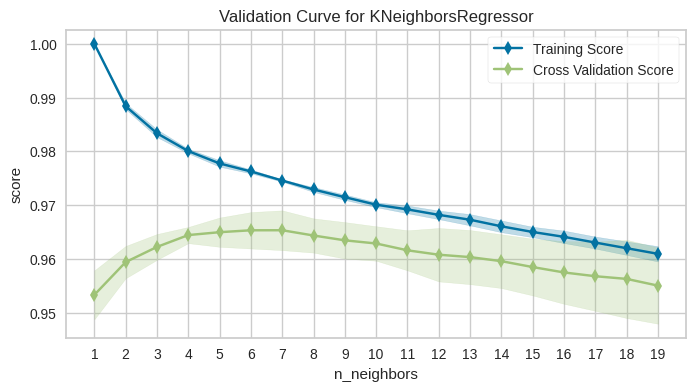

In [146]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(KNeighborsRegressor(), param_name = "n_neighbors",
                      param_range = np.arange(1, 20, 1),
                      cv = 5,
                      scoring = 'r2',
                      size = (800, 400),
                      n_jobs = -1)
viz.fit(X_train, y_train)
plt.xticks(ticks = np.arange(1, 20, 1))
viz.show();

In [147]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 100, 1)}
grid_search = GridSearchCV(knn, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"Лучшее количество ближайших соседей: {best_k}")

Лучшее количество ближайших соседей: 7


## Обучение модели

Обучить модель KNN с найденным оптимальным значением количества ближайших соседей на тренировочной выборке.

In [148]:
knn_reg = KNeighborsRegressor(n_neighbors = best_k)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=np.int64(7))

Вывести предсказанные значения целевого признака.

In [149]:
pred_train = knn_reg.predict(X_train)
pred_test = knn_reg.predict(X_test)
print(pred_train[:10])
print(pred_test[:10])

[ 21.48707958 -97.95242251 117.59047862  42.7760466   66.07443952
 -55.69111545 148.56224539  64.79565092  33.0834894  -12.98135034]
[  -4.06927258   34.72977931  -35.01094685  -42.88995022 -103.75727204
  -10.39419082   63.60417636 -101.54563858   30.81337221  168.45253624]


## Оценивание качества модели

Вычислить среднюю квадратическую ошибку и коэффициент детерминации для данных обучающей и тестовой выборок.

In [150]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)

R2_train = r2_score(y_train, pred_train)
R2_test = r2_score(y_test, pred_test)

print(f"MSE_train: {MSE_train}")
print(f"MSE_test: {MSE_test}")

print(f"R2_train: {R2_train}")
print(f"R2_test: {R2_test}")

MSE_train: 124.26431136926678
MSE_test: 126.13379603370151
R2_train: 0.9759528138683057
R2_test: 0.974054544144649


# **3. Метод взвешенных KNN**

## На основе расстояний

### Подбор оптимального количества ближайших соседей

Осуществить подбор количества ближайших соседей следующими способами:
- визуальный анализ зависимости метрик качества от количества ближайших соседей;
- визуальный анализ валидационных кривых;
- поиск на сетке.

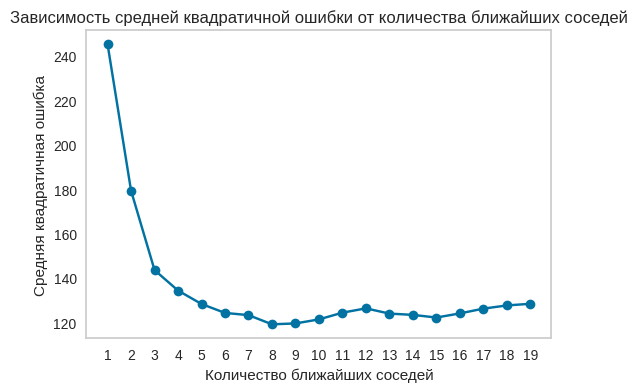

In [151]:
k_values = np.arange(1, 20, 1)
mse_list = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k,
                              weights = 'distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.figure(figsize = (6, 4))
plt.plot(k_values, mse_list, marker = 'o')
plt.xlabel('Количество ближайших соседей')
plt.ylabel('Средняя квадратичная ошибка')
plt.title('Зависимость средней квадратичной ошибки от количества ближайших соседей')
plt.xticks(ticks = np.arange(1, 20, 1))
plt.grid()
plt.show()

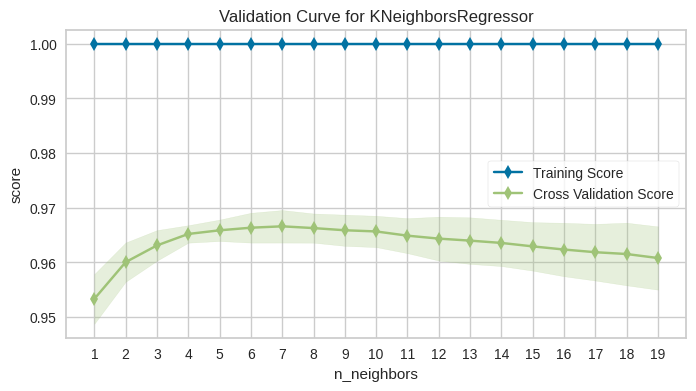

In [152]:
viz = ValidationCurve(KNeighborsRegressor(weights = 'distance'),
                      param_name = "n_neighbors",
                      param_range = np.arange(1, 20, 1),
                      cv = 5,
                      scoring = 'r2',
                      size = (800, 400),
                      n_jobs = -1)

viz.fit(X_train, y_train)
plt.xticks(ticks = np.arange(1, 20, 1))
viz.show();

In [153]:
knn = KNeighborsRegressor(weights = 'distance')
param_grid = {'n_neighbors': range(1, 20, 1)}
grid_search = GridSearchCV(knn, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
optimal_k = grid_search.best_params_['n_neighbors']
print(f"Оптимальное значение n_neighbors: {optimal_k}")

Оптимальное значение n_neighbors: 7


### Обучение модели

Обучить модель взвешенных KNN с найденным оптимальным значением количества ближайших соседей на тренировочной выборке.

In [154]:
knn_w = KNeighborsRegressor(n_neighbors = optimal_k, weights = 'distance')
knn_w.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7, weights='distance')

Вывести предсказанные значения целевого признака.

In [155]:
pred_train_w = knn_w.predict(X_train)
pred_test_w = knn_w.predict(X_test)

print(pred_train_w[:10])
print(pred_test_w[:10])

[ 22.06775607 -98.87209955 123.29713326  37.10465294  64.07551316
 -52.87283061 142.20112552  71.88295488  25.00625507 -27.44167611]
[  -0.7334736    35.76458443  -33.54168631  -42.68119637 -106.56171709
   -9.62998839   63.01718614 -100.60232967   34.60864025  165.36208819]


### Оценивание качества модели

Вычислить среднюю квадратическую ошибку и коэффициент детерминации для данных обучающей и тестовой выборок.

In [156]:
MSE_train_W = mean_squared_error(y_train, pred_train_w)
MSE_test_W = mean_squared_error(y_test, pred_test_w)

R2_train_W = r2_score(y_train, pred_train_w)
R2_test_W = r2_score(y_test, pred_test_w)

print(f"MSE_train: {MSE_train_W}")
print(f"MSE_test: {MSE_test_W}")

print(f"R2_train: {R2_train_W}")
print(f"R2_test: {R2_test_W}")

MSE_train: 0.0
MSE_test: 123.32328081860764
R2_train: 1.0
R2_test: 0.9746326611976276


## На основе ядерных функций

Выбрать ядерную функцию и создать класс, реализующий расчет предсказаний целевого признака с использованием формулы Надарая-Ватсона.

In [157]:
import numpy as np
from scipy.spatial.distance import cdist

class NadarayaWatsonRegressor:

    def __init__(self, kernel = 'gaussian', h = 1.0):

        self.kernel = kernel
        self.h = h
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):

        self.X_train = X.copy()
        self.y_train = y.copy()
        return self

    def _gaussian_kernel(self, distances):

        return np.exp(-0.5 * (distances / self.h) ** 2)

    def _epanechnikov_kernel(self, distances):

        u = distances / self.h
        weights = 1 - u ** 2
        weights[weights < 0] = 0
        return weights

    def predict(self, X):

        distances = cdist(X, self.X_train)

        if self.kernel == 'gaussian':
            weights = self._gaussian_kernel(distances)
        elif self.kernel == 'epanechnikov':
            weights = self._epanechnikov_kernel(distances)
        else:
            raise ValueError('Неизвестный тип ядра. Доступные варианты: "gaussian", "epanechnikov"')

        numerator = np.sum(weights * self.y_train, axis = 1)
        denominator = np.sum(weights, axis = 1)

        return numerator / denominator

Подобрать ширину окна.

In [158]:
kernels = ['gaussian', 'epanechnikov']
bandwidths = [0.1, 0.5, 1.0, 2.0]

results = []

for kernel in kernels:
    for h in bandwidths:
        model = NadarayaWatsonRegressor(kernel = kernel, h = h)
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)

        results.append({
            'kernel': kernel,
            'bandwidth': h,
            'mse_train': mse_train,
            'mse_test': mse_test,
            'r2_train': r2_train,
            'r2_test': r2_test
        })

for result in results:
    print(f"Ядро: {result['kernel']}, h: {result['bandwidth']}")
    print(f"  R² train: {result['r2_train']:.4f}, R² test: {result['r2_test']:.4f}")
    print(f"  MSE train: {result['mse_train']:.4f}, MSE test: {result['mse_test']:.4f}")


Ядро: gaussian, h: 0.1
  R² train: 0.9127, R² test: 0.9164
  MSE train: 451.2786, MSE test: 406.4551
Ядро: gaussian, h: 0.5
  R² train: 0.1834, R² test: 0.1831
  MSE train: 4219.7323, MSE test: 3971.2098
Ядро: gaussian, h: 1.0
  R² train: 0.0513, R² test: 0.0489
  MSE train: 4902.4983, MSE test: 4623.7914
Ядро: gaussian, h: 2.0
  R² train: 0.0132, R² test: 0.0102
  MSE train: 5099.2801, MSE test: 4812.0615
Ядро: epanechnikov, h: 0.1
  R² train: 0.9774, R² test: 0.9772
  MSE train: 116.7552, MSE test: 110.7479
Ядро: epanechnikov, h: 0.5
  R² train: 0.5400, R² test: 0.5333
  MSE train: 2376.9124, MSE test: 2269.0356
Ядро: epanechnikov, h: 1.0
  R² train: 0.1245, R² test: 0.1204
  MSE train: 4524.1254, MSE test: 4276.2262
Ядро: epanechnikov, h: 2.0
  R² train: 0.0276, R² test: 0.0247
  MSE train: 5024.7430, MSE test: 4741.3520


### Обучение модели

Обучить модель взвешенных KNN с найденным оптимальным значением ширины окна на тренировочной выборке.

In [159]:
model = NadarayaWatsonRegressor(kernel = 'epanechnikov', h = 0.1)
model.fit(X_train, y_train)

Вывести предсказанные значения целевого признака.

In [160]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_pred_train[:10])
print(y_pred_test[:10])

[ 23.68561357 -96.84567008 111.86113015  41.58255071  60.37772418
 -50.5376575  142.53985258  57.44227692  24.77901205 -18.38793686]
[ -8.09767839  37.30902293 -33.34684713 -35.95343308 -98.13222031
 -11.75481834  58.90983526 -97.13074196  20.43431301 157.80455913]


### Оценивание качества модели

Вычислить среднюю квадратическую ошибку и коэффициент детерминации для данных обучающей и тестовой выборок.

In [161]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)

print(f"MSE_train: {MSE_train:.4f}")
print(f"MSE_test: {MSE_test:.4f}")
print(f"R2_train: {R2_train:.4f}")
print(f"R2_test: {R2_test:.4f}")

MSE_train: 116.7552
MSE_test: 110.7479
R2_train: 0.9774
R2_test: 0.9772
